In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
connection_str = "postgresql://localhost:5432/<your_db_name>"

In [3]:
engine = create_engine(connection_str)

In [4]:
# Bonus: Importing the "salaries" SQL database into pandas
df_salaries = pd.read_sql("SELECT * FROM salaries", con=engine)

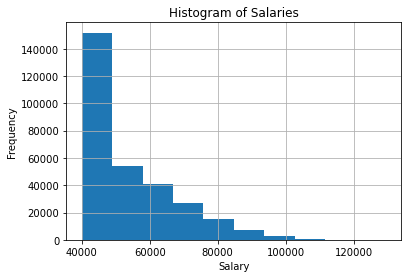

In [5]:
# Bonus: Creating a histogram to visualize the most common salary ranges for employees
df_salaries["salary"].hist()
plt.title("Histogram of Salaries")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.savefig("../images/salaries_histogram.png")
plt.show()

In [6]:
# Bonus: Importing the "titles" SQL database into pandas
df_titles = pd.read_sql("SELECT * FROM titles", con=engine).rename(columns={"title_id": "emp_title_id"})  

# Bonus: Importing the "employees" SQL database into pandas
df_employees = pd.read_sql("SELECT emp_no, emp_title_id FROM employees", con=engine)

# Merging df_titles and df_employees 
df_merge_1 = pd.merge(df_titles, df_employees, on="emp_title_id", how="inner")

# Merging df_merge_1 and df_salaries 
df_merge_2 = pd.merge(df_merge_1, df_salaries, on="emp_no", how="inner")

# Calculating average salary by title and sorting dataframe by average salary
avg_salary_title = df_merge_2.groupby("title")["salary"].mean().reset_index() 
avg_salary_title_sort = avg_salary_title.sort_values(["salary"], ascending=False)
avg_salary_title_sort

,title,salary
4,Senior Staff,58550.172704
5,Staff,58465.382850
2,Manager,51531.041667
6,Technique Leader,48582.896092
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
3,Senior Engineer,48506.799871


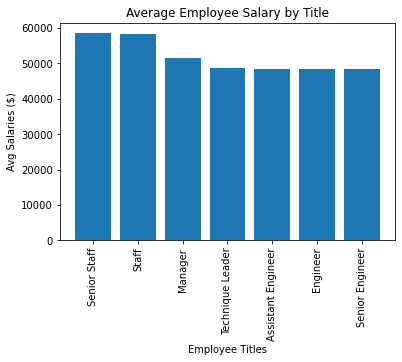

In [7]:
# Bonus: Creating a bar chart of average salary by title
x_axis = avg_salary_title_sort["title"]
y_axis = avg_salary_title_sort["salary"]
 
plt.title("Average Employee Salary by Title")
plt.xlabel("Employee Titles")
plt.ylabel("Avg Salaries ($)")
plt.bar(x_axis, y_axis)
plt.xticks(rotation="vertical")
plt.savefig("../images/avg_salary_title.png")
plt.show()